# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 4 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдите в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выберите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [2]:
### BEGIN YOUR CODE

Student_ID = 3

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [3]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'Chipotle' доступен по следующей ссылке: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 1


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [2]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

# !unzip ...
# !tar ...
# !gunzip ...

### END YOUR CODE

--2025-05-06 19:33:59--  https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364975 (356K) [text/plain]
Saving to: ‘chipotle.tsv’

chipotle.tsv        100%[===================>] 356.42K  --.-KB/s    in 0.06s   

2025-05-06 19:33:59 (5.86 MB/s) - ‘chipotle.tsv’ saved [364975/364975]



##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [3]:
import pandas as pd

df = pd.read_table('chipotle.tsv')

for c in df.columns:
  df.rename(columns={c: c.lower()})

df

# Place your code to read the dataset here. Don't forget to import all the libraries you need!

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


##### 3. Какие столбцы присутствуют в наборе данных? (0.1 балла)

In [16]:
columns = list(df.columns) # Place your code here instead of '...'

print(columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.1 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольким продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [29]:
most_popular = df['item_name'].mode()[0]

answer1 = most_popular

print(answer1)

Chicken Bowl


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.1 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passengers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (GB) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [74]:
answer2 = df['item_name'].value_counts()[answer1]

print(answer2)

726


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.2 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [39]:
sum = df.apply(lambda row: float(row.item_price[1:]), axis=1).sum()

answer3 = sum

print(answer3)

34500.16


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.25 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`countries_en`) имеющего максимальное содержание холестерина?

In [60]:
# Общий доход разделить на кол-во заказов
answer4 = answer3 / df['order_id'].nunique()

print(answer4)

21.39423118865867


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (0.25 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Приведите названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [38]:
# df.item_name.unique()

drinks = df[(df.item_name == 'Canned Soda') | (df.item_name == 'Canned Soft Drink') | (df.item_name == '6 Pack Soft Drink')]

drinks.loc[:, ['drink_name']] = drinks.apply(lambda row: row.choice_description[1:-1], axis=1)
drinks.loc[:, ['sum']] = df.apply(lambda row: float(row.item_price[1:]), axis=1)

print(drinks.drink_name.unique())

most_popular = str(drinks.drink_name.mode()[0])

print(most_popular)

popular_df = drinks[drinks.drink_name == most_popular];

answer5 = popular_df[['sum']].sum()

print(answer5)

['Sprite' 'Dr. Pepper' 'Mountain Dew' 'Diet Dr. Pepper' 'Coca Cola'
 'Diet Coke' 'Coke' 'Lemonade' 'Nestea']
Diet Coke
sum    326.71
dtype: float64


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (0.5 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найдити самый опасный продукт, содержащий наибольшее количество аллергенов.

In [35]:
drinks = df[(df.item_name == 'Canned Soda') | (df.item_name == 'Canned Soft Drink') | (df.item_name == '6 Pack Soft Drink')]

drinks.loc[:, ['drink_name']] = drinks.apply(lambda row: row.choice_description[1:-1], axis=1)
# drinks.loc[:, ['sum']] = df.apply(lambda row: row.quantity * float(row.item_price[1:]), axis=1)
drinks.loc[:, ['sum']] = df.apply(lambda row: float(row.item_price[1:]), axis=1)

# не вегетерианские блюда и не напитки
not_veggie_df = df[(df.item_name != 'Canned Soda') & (df.item_name != 'Canned Soft Drink') & (df.item_name != '6 Pack Soft Drink') & (df.item_name.str.contains("Veggie") == False)]
# только вегетерианские блюда
veggie_df = df[df.item_name.str.contains("Veggie")]

# вычисляем только вегетерианские заказы
orders = set(df.order_id)
not_veggie_orders = set(not_veggie_df.order_id)
only_veggie_orders = set(veggie_df.order_id)
veggie_orders = set(orders - not_veggie_orders) & only_veggie_orders

print(veggie_orders)

# другой вариант - выбрать те заказы где были вегетерианские блюда (не понимаю точно что подразумевалось в вопросе)
# veggie_df = df[df.item_name.str.contains("Veggie")]

# # print(veggie_df.item_name.unique())

# veggie_orders = list(veggie_df.order_id)

# print(veggie_orders)

# только напитки которые в вегетерианских заказах
veggie_drinks = drinks[drinks.order_id.isin(veggie_orders)]

# print(veggie_drinks)

answer6 = veggie_drinks['sum'].sum()

print(answer6)

{512, 668, 1312, 1155, 801, 1635, 1094, 1706, 1132, 1294, 1263, 1532, 1395, 567, 1208, 985, 348, 1049}
7.18


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (0.5 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (fiber) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [51]:
# не вегетерианские блюда и не напитки
not_veggie_df = df[(df.item_name != 'Canned Soda') & (df.item_name != 'Canned Soft Drink') & (df.item_name != '6 Pack Soft Drink') & (df.item_name.str.contains("Veggie") == False)]
# только вегетерианские блюда
veggie_df = df[df.item_name.str.contains("Veggie")]

# вычисляем только вегетерианские заказы
orders = set(df.order_id)
not_veggie_orders = set(not_veggie_df.order_id)
only_veggie_orders = set(veggie_df.order_id)
veggie_orders = set(orders - not_veggie_orders) & only_veggie_orders

print(veggie_orders)

answer7 = len(veggie_orders) # Place your code here instead of '...'

print(answer7)

{512, 668, 1312, 1155, 801, 1635, 1094, 1706, 1132, 1294, 1263, 1532, 1395, 567, 1208, 985, 348, 1049}
18


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с буррито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, являющейся наиболее сбалансированной с точки зрения среднего содержания белков, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [14]:
burrito_df = df[df.item_name == "Chicken Burrito"]

# добавляем столбец со списками добавок, удаляя резделители и обрезая
burrito_df.loc[:, ["adds"]] = burrito_df.apply(lambda r: list(map(str.strip, str(r.choice_description).replace("[", "").replace("]", "").split(','))), axis=1)

# взрываем списки в отдельный Series
unwrapped = burrito_df["adds"].explode(ignore_index=True)

print(unwrapped.size)
print(unwrapped.head())

# для наглядности подсчитаем значения
counts = unwrapped.value_counts()

print(counts)

# мода - самая популярная добавка
answer8 = unwrapped.mode()[0];

print(answer8)

2947
0    Tomatillo-Green Chili Salsa (Medium)
1                             Pinto Beans
2                                  Cheese
3                              Sour Cream
4               Fresh Tomato Salsa (Mild)
Name: adds, dtype: object
adds
Rice                                    509
Cheese                                  462
Sour Cream                              336
Lettuce                                 329
Black Beans                             282
Fresh Tomato Salsa                      208
Guacamole                               180
Pinto Beans                             105
Fajita Vegetables                        97
Tomatillo Red Chili Salsa                72
Fajita Veggies                           68
Roasted Chili Corn Salsa                 67
Fresh Tomato Salsa (Mild)                57
Tomatillo-Red Chili Salsa (Hot)          47
Roasted Chili Corn Salsa (Medium)        45
Tomatillo Green Chili Salsa              40
Tomatillo-Green Chili Salsa (Medium)     34
Fresh 

##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Постройте гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Постройте столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


   order_id    sum
0         1   2.39
1         1   3.39
2         1   3.39
3         1   2.39
4         2  16.98
             sum
order_id        
926       205.25
1443      160.74
1483      139.00
691       118.25
1786      114.30
1834
195.17
18.811428571428575


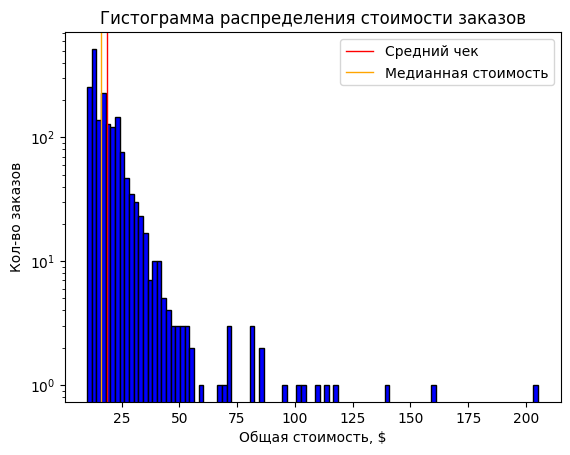

In [55]:
import matplotlib.pyplot as plt

orders = df.copy()

orders.loc[:, ['sum']] = df.apply(lambda row: float(row.item_price[1:]), axis=1)

orders = orders[["order_id", "sum"]];

print(orders.head())

orders = orders.groupby(["order_id"]).sum()

orders = pd.DataFrame(orders)

orders = orders.sort_values(["sum"], ascending=False)

print(orders.head())

min = orders["sum"].min();
max = orders["sum"].max();

diff = max - min;

print(orders.size)
print(diff)

# рисуем гистограмму - деление по x 2 доллара
plt.hist(orders['sum'], color = 'blue', edgecolor = 'black',
         bins = int(diff/2))

plt.yscale('log')
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Общая стоимость, $')
plt.ylabel('Кол-во заказов')

avg_check = orders["sum"].mean()

print(avg_check)

plt.axvline(avg_check, color='red', linewidth=1, label=f"Средний чек {avg_check}")
plt.axvline(orders["sum"].median(), color='orange', linewidth=1, label=f"Медианная стоимость {(orders.sum.median())}")

plt.legend()
plt.show()
